## Network Security using Machine Learning

**Problem Statement**

Building a Predictive Model to Classify Network Security Attacks.
Network security is the general practice of protecting computer networks and devices
accessible to the network against malicious intent, misuse and denial.
Exploring patterns is one of the main strengths of machine learning, and there are many
inherent patterns to discover in the network traffic data. At first glance, network packet
capture data may appear sporadic and random, but most communication flows follow
strict network protocol.

Importing Libraries

In [3]:
import os
# import arff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Importing the Dataset using Pandas

In [4]:
df = pd.read_csv("KDDTrain+.txt")

Displaying top 5 rows of the dataset

In [5]:
df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [6]:
df.shape

(125972, 43)

### Observation
-- No. of records = 125972

-- No. of Features = 43

Columns in the dataset

In [7]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

In [8]:
df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


Updating the columns name in the data frame

In [9]:
df.columns = columns

Checking the datatypes in the data frame

In [11]:
# get the model summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

#### Observations
-- No. of numberic features = 39

-- No. of categorical features = 4

Checking the duplicate rows in the dataset

In [12]:
# checking for duplicate records
df.duplicated().sum()

0

#### Observation
-- No duplicate records

Checking the null and dtypes of dataset

In [14]:
# check for null values
df.isnull().sum().sum()

0

#### Observation
-- No null value

Checking the missing values in the dataset

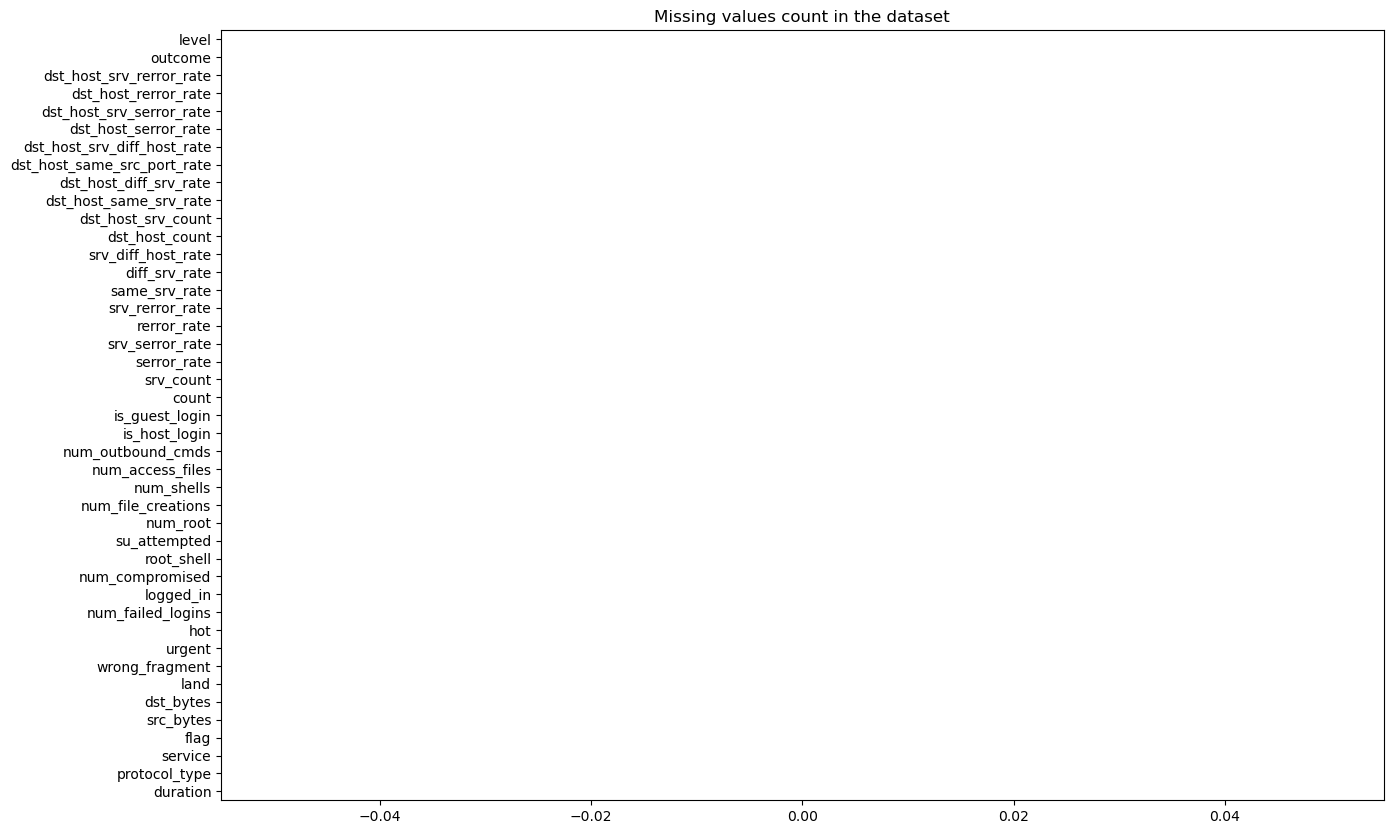

In [16]:
plt.figure(figsize=(15,10))
df.isnull().sum().plot(kind="barh")
plt.title("Missing values count in the dataset")
plt.show()

Checking the stats of the dataset

In [18]:
# get the descriptice summary of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125972.0,287.146929,2.604526e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125972.0,45567.100824,5.870354e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125972.0,19779.271433,4.021285e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125972.0,0.000198,1.408613e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125972.0,0.022688,2.535310e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125972.0,0.000111,1.436608e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125972.0,0.204411,2.149977e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125972.0,0.001222,4.523932e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125972.0,0.395739,4.890107e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125972.0,0.279253,2.394214e+01,0.0,0.00,0.00,0.00,7.479000e+03


Checking the Correlation among the features

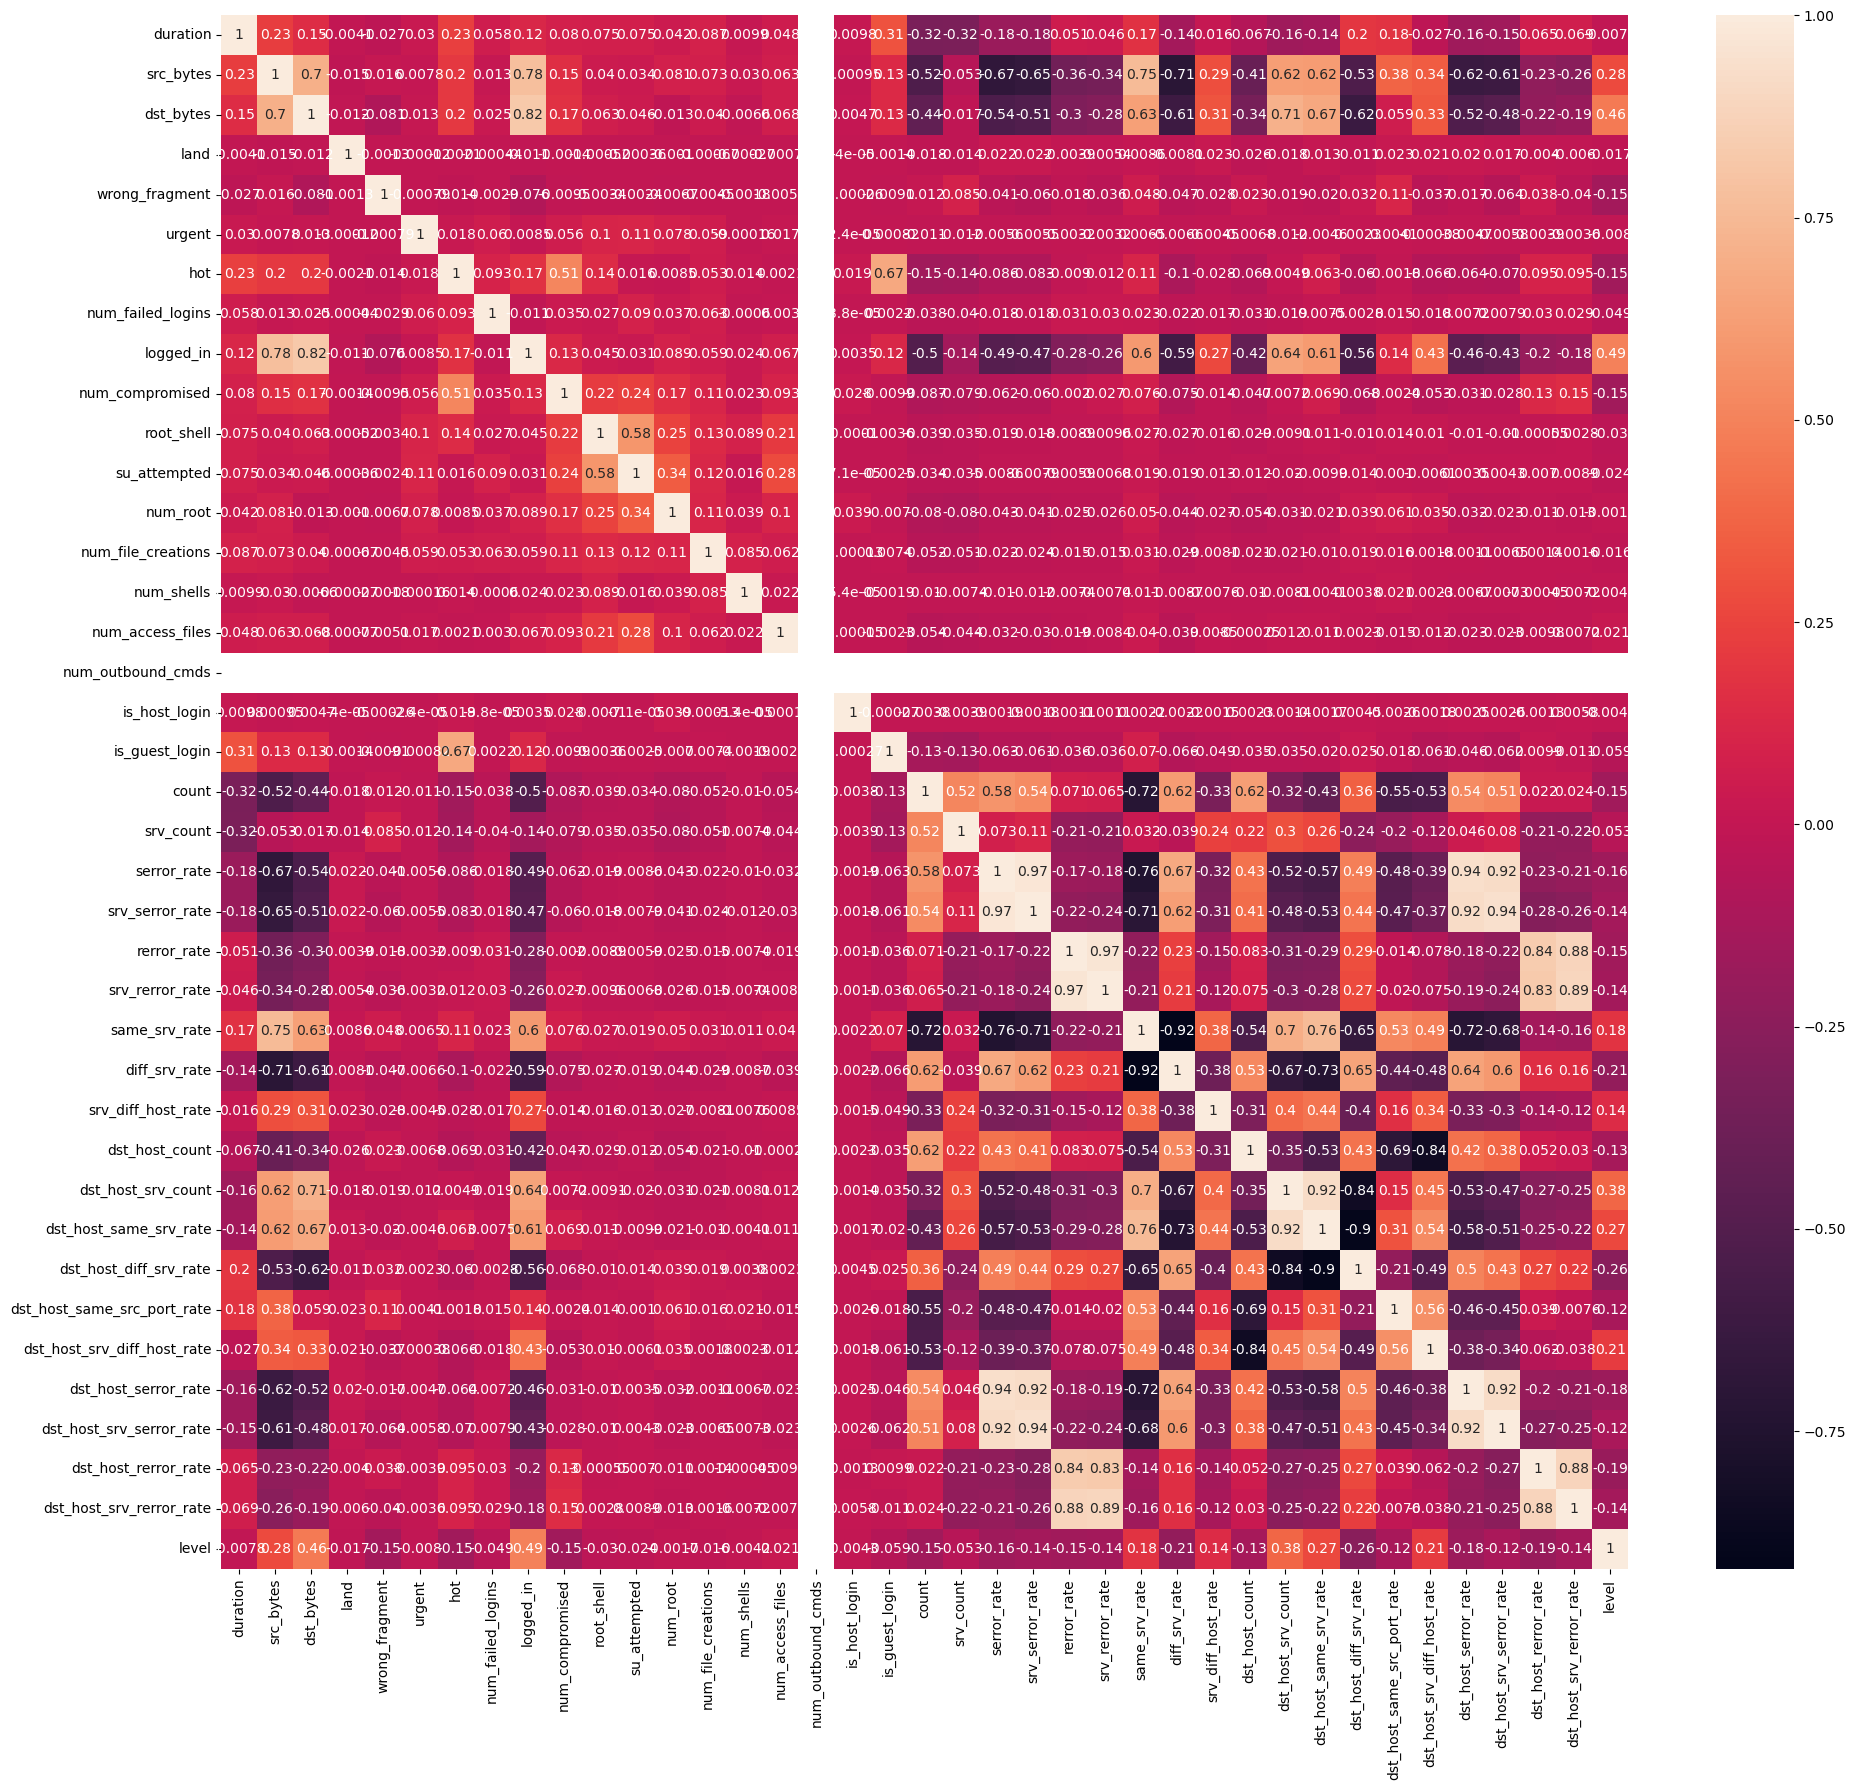

In [25]:
# checking for coorelation
corr_matrix = df.corr(method="spearman")
plt.figure(figsize=(20,18))
sns.heatmap(corr_matrix,annot=True)
plt.tight_layout()
plt.show()

Filtering the features having correlation higher than 0.7

<Axes: >

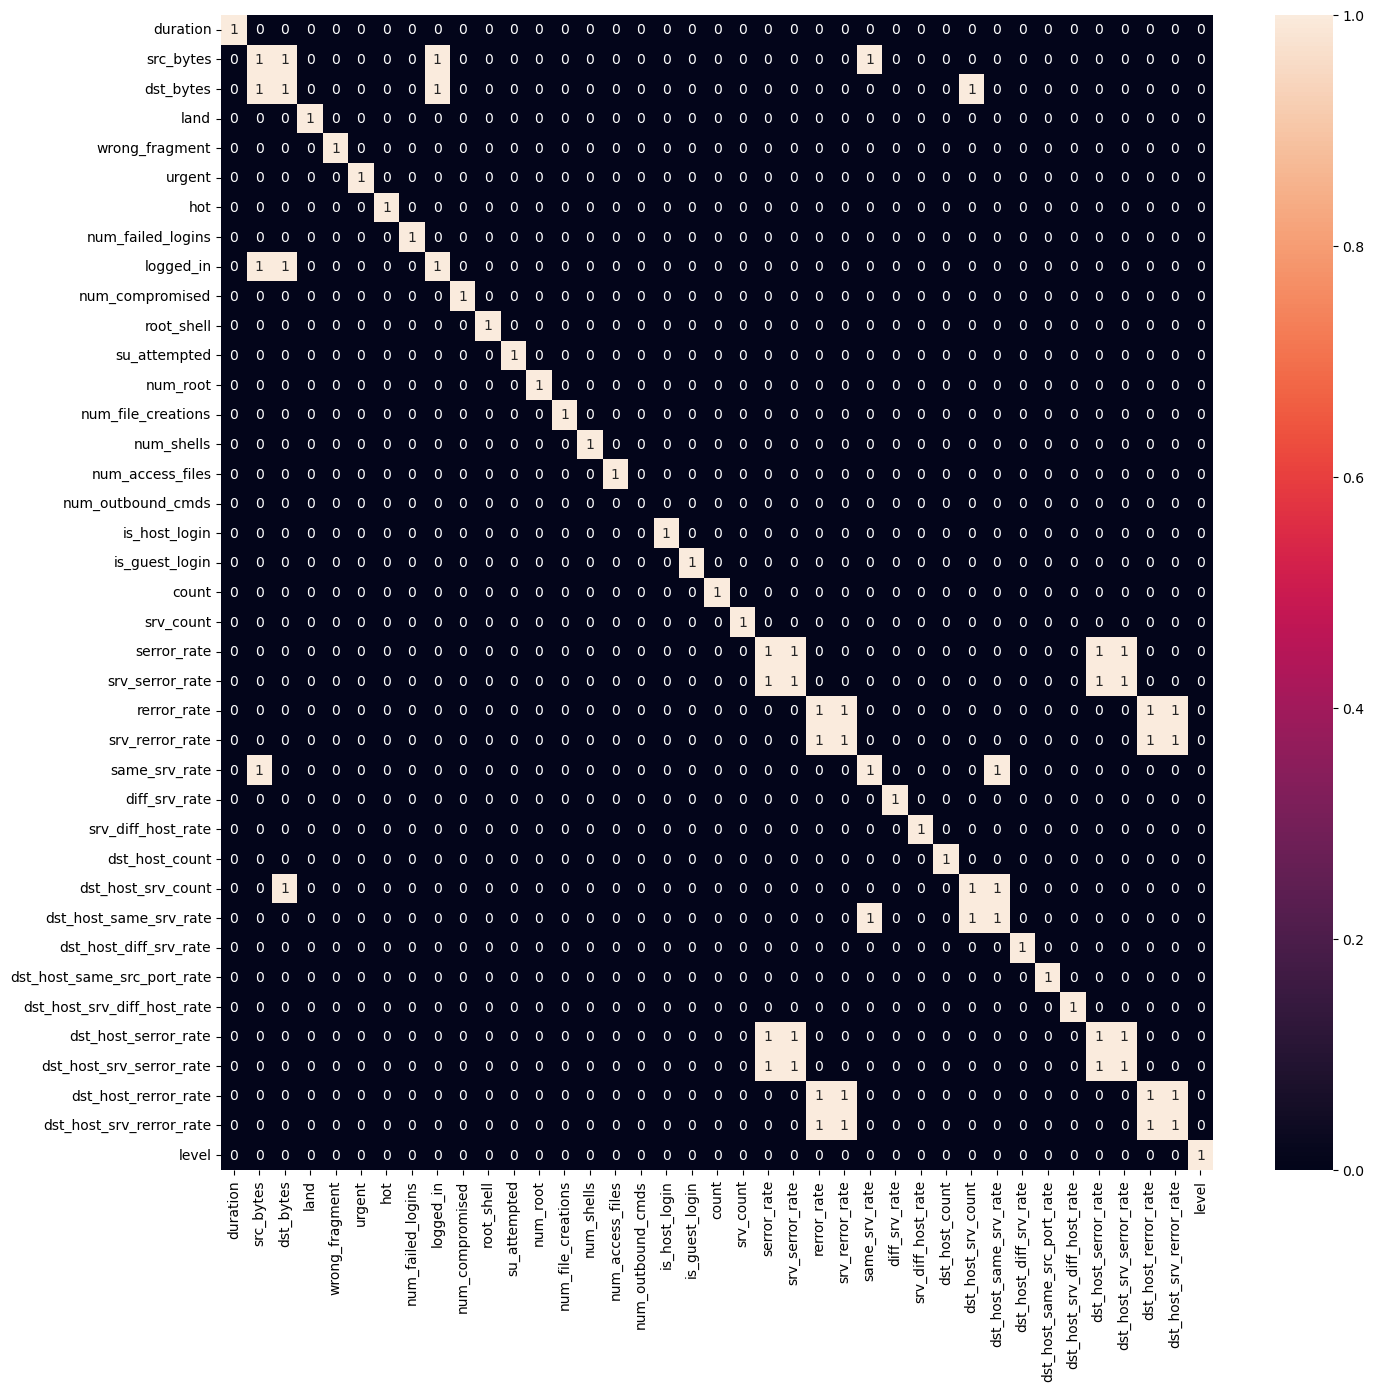

In [30]:
plt.figure(figsize=(16,15))
sns.heatmap(corr_matrix>0.7,annot=True)

Checking the unique values in categorical features

In [37]:
cat_cols = df.select_dtypes(include = "object").columns
cat_cols

Index(['protocol_type', 'service', 'flag', 'outcome'], dtype='object')

In [38]:
num_cols = df.select_dtypes(include="number").columns
num_cols

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

In [43]:
len(df["protocol_type"].unique())

3

In [45]:
# checking unique values in each categorical columns
for col in cat_cols:
    print(f"Number of unique values in column {col} = {len(df[col].unique())}")

Number of unique values in column protocol_type = 3
Number of unique values in column service = 70
Number of unique values in column flag = 11
Number of unique values in column outcome = 23


Plotting unique categories in the target feature

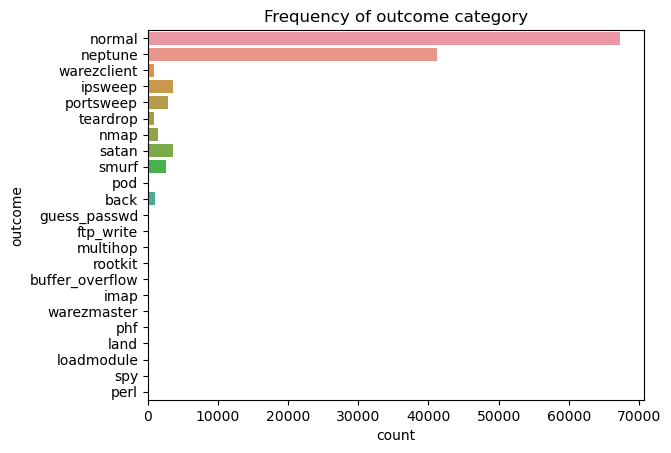

In [47]:
sns.countplot(data = df,y="outcome")
plt.title("Frequency of outcome category")
plt.show()


Feature Engineering

In [48]:
# Categoical Encoding

# if the outcome is normal then the attack feature will have value 0 else 1
df["attack"] = [0 if i=="normal" else 1 for i in df["outcome"]]

Checking if dataset is Balanced

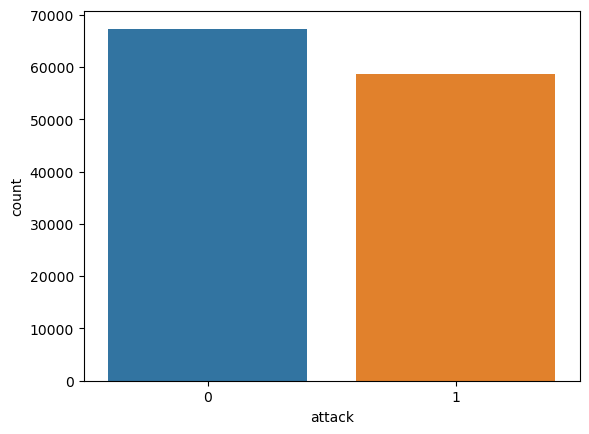

In [49]:
sns.countplot(data=df, x="attack")
plt.show()

Observation:

-- Dataset is balanced

<Axes: >

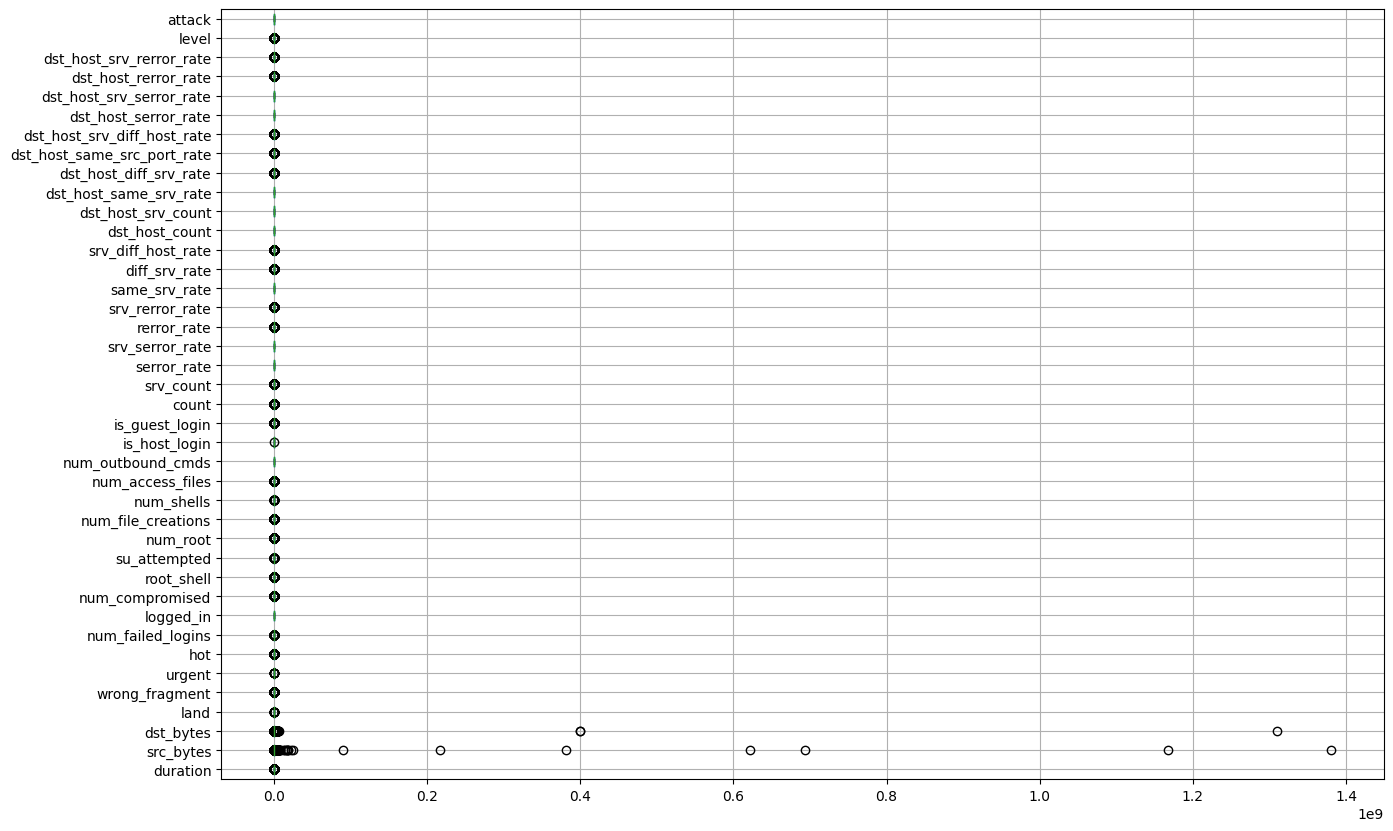

In [21]:
plt.figure(figsize=(15,10))
df.boxplot(vert=False)

Checking using which protocol results in attack

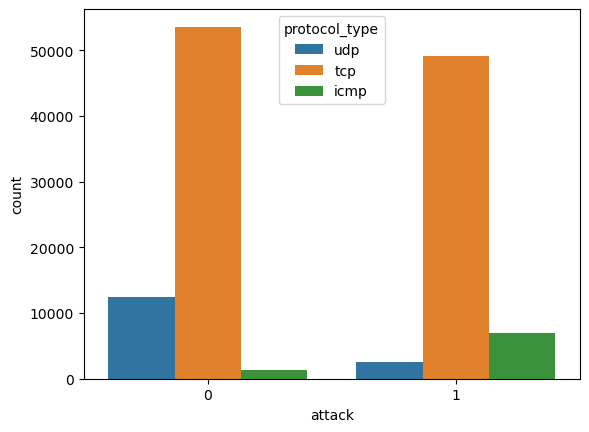

In [52]:
sns.countplot(data = df, x = "attack",hue = "protocol_type")
plt.show()

Observation:

-- Most attack is through `tcp` protocol

In [53]:
df.drop(["outcome"], axis=1,inplace = True)  #dropping the outcome column

In [26]:
df.to_csv("updated_df.csv", index=False, header=True)